In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator",
    "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"
]
dataset = pd.read_csv('zoo.data',names=column_names)
dataset

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:

dataset.fillna(dataset.mean(), inplace=True)
dataset

TypeError: Could not convert ['aardvarkantelopebassbearboarbuffalocalfcarpcatfishcavycheetahchickenchubclamcrabcrayfishcrowdeerdogfishdolphindoveduckelephantflamingofleafrogfrogfruitbatgiraffegirlgnatgoatgorillagullhaddockhamsterharehawkherringhoneybeehouseflykiwiladybirdlarkleopardlionlobsterlynxminkmolemongoosemothnewtoctopusopossumoryxostrichparakeetpenguinpheasantpikepiranhapitviperplatypuspolecatponyporpoisepumapussycatraccoonreindeerrheascorpionseahorsesealsealionseasnakeseawaspskimmerskuaslowwormslugsolesparrowsquirrelstarfishstingrayswantermitetoadtortoisetuataratunavampirevolevulturewallabywaspwolfwormwren'] to numeric

In [11]:

X = dataset.drop(columns=["class_type"])
y = dataset["class_type"]
label_encoder = LabelEncoder()
X["animal_name"] = label_encoder.fit_transform(X["animal_name"])

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Regression Model
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# MEAN SQUARED ERROR

In [15]:
# Compile the model
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.9622 - val_loss: 6.8192
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2365 - val_loss: 5.3469
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3520 - val_loss: 4.1455
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5296 - val_loss: 3.2129
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7701 - val_loss: 2.5204
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0923 - val_loss: 2.0217
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3296 - val_loss: 1.6804
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8074 - val_loss: 1.4318
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2412 - val_loss: 1.2567
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9044 - val_loss: 1.1140
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4615 - val_loss: 0.9747
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1874 - val_loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0880
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - val_loss: 0.0894
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0176 - val_loss: 0.0869
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0190 - val_loss: 0.0866
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0170 - val_loss: 0.0872
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0152 - val_loss: 0.0880
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0894
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0895
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0141 - val_loss: 0.0906
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130 - val_loss: 0.0913
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - val_loss: 0.0925
Epoch 81/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0930
E

In [17]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 
Training Loss: 0.005382978823035955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0943
Test Loss: 0.0942625179886818


In [18]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

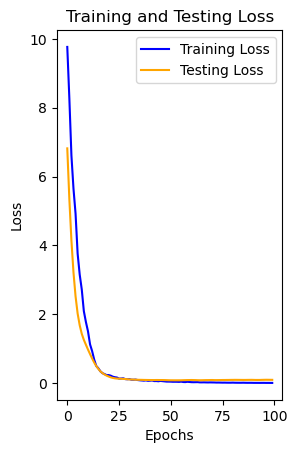

In [19]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

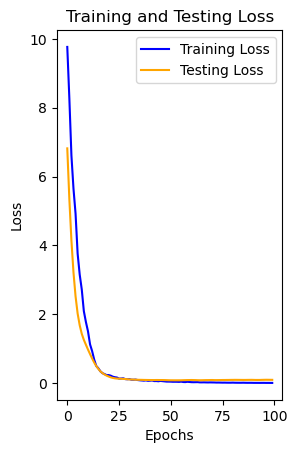

In [20]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# MEAN ABSOLUTE ERROR

In [22]:
# Compile the model with Mean Absolute Error loss metric
regression_model.compile(optimizer='adam', loss='mean_absolute_error')

In [23]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0799 - val_loss: 0.1888
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0914 - val_loss: 0.2158
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0795 - val_loss: 0.2184
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0654 - val_loss: 0.1876
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0606 - val_loss: 0.1869
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0532 - val_loss: 0.2119
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0553 - val_loss: 0.1955
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0580 - val_loss: 0.1913
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0430 - val_loss: 0.1981
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0563 - val_loss: 0.1852
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0510 - val_loss: 0.1868
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - val_loss: 0.2

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0260 - val_loss: 0.1694
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0227 - val_loss: 0.1669
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0227 - val_loss: 0.1607
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - val_loss: 0.1781
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0330 - val_loss: 0.1522
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - val_loss: 0.1535
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - val_loss: 0.1612
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0264 - val_loss: 0.1617
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0264 - val_loss: 0.1733
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0230 - val_loss: 0.1592
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0212 - val_loss: 0.1601
Epoch 81/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0243 - val_loss: 0.1645


In [24]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0258 
Training Loss: 0.024959063157439232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1620
Test Loss: 0.16203376650810242


In [25]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

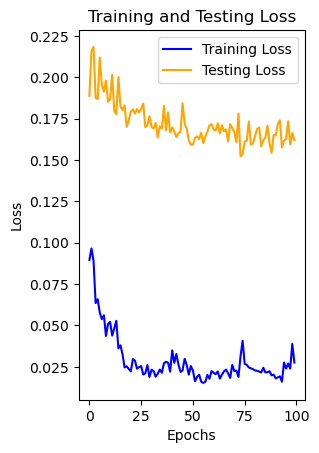

In [26]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [27]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>